# Loading

Let's explore how the initial distribution of the molecules in the mobile phase (~ loading of the column) affects the chromatography.

## Loading During Multiple Cells

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

(0.0, 1000.0)

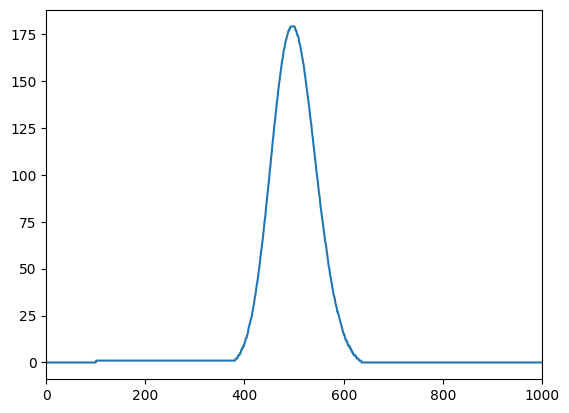

In [5]:
# Define parameters
n_cells = 100
n_steps = 1_000
n_molecules = 100_000
n_loading_cells = 3
K = 4

frac_bound = K / (1 + K)

# Initial state (zero everywhere)
stationary_phase = np.zeros(n_cells)
mobile_phase = np.zeros(n_cells + n_steps)

# Loading of mobile phase in multiple cells
for i in range(n_loading_cells):
    mobile_phase[n_cells + 1] = n_molecules//5

for step in range(1, n_steps + 1):
    # Equilibration
    for cell in range(n_cells):
        n_tot = stationary_phase[cell] + mobile_phase[cell + step]
        n_bound = np.floor(n_tot * frac_bound)
        n_free = n_tot - n_bound
        stationary_phase[cell] = n_bound
        mobile_phase[cell + step] = n_free

plt.plot(mobile_phase)
plt.xlim(0, n_steps)
